## scikit-learn 패키지
- Python의 머신 러닝 라이브러이이다. `사이킷런`이라고 부르기도 한다. 
- 오픈소스로 공개되어 있으며, 개인, 비즈니스 관계없이 누구나 무료로 사용가능하다. 
- 딥러닝보다는 데이터 전처리 및 classical machine learning 알고리즘 (SVM, decision tree 기반 알고리즘 등)을 매우 편하게 이용할 수 있다. 
- 샘플 데이터 셋이 부속되어 있어 설치하여 바로 기계 학습을 시험해볼 수 있다.

In [2]:
import sklearn
from sklearn import datasets

- sklearn은 샘플데이터셋을 제공하는데 `load_boston`, `load_diabetes`, `load_digits`, `load_files`, `load_iris`, `load_breast_cancer`, `load_linnerud`, `load_sample_image`, `load_sample_images`, `load_svmlight_file`, `load_svmlight_files`, `load_wine` 등의 함수로 샘플 데이터 셋을 불러 올 수 있다.

#### Boston house prices dataset
- `load_boston` 함수를 통해 샘플 데이터를 불러올 수 있다. 
- scikit-learn 1.0에서 deprecated 됐으며 1.2 버전에서는 삭제 될 예정이다.
- UCI ML housing dataset의 복사본이다. https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

#### Iris plants dataset
- `load_iris` 함수를 통해 샘플 데이터를 불러올 수 있다. 
- 붓꽃의 꽃받침과 꽃잎에 대한 높이와 너비에 대한 샘플 데이터 셋이고 주로 classification 학습을 위한 테스트 데이터 셋으로 활용된다.

#### Diabetes dataset
- `load_diabetes` 함수를 통해 샘플 데이터를 불러올 수 있다.
- 당뇨병에 대한 데이터 셋이다. 나이, 성별, 혈압 등의 데이터가 포함되어 있다. 주로 regression 학습을 위한 테스트 데이터 셋으로 활용된다.

#### Optical recognition of handwritten digits dataset
- `load_digits` 함수를 통해 샘플 데이터를 불러올 수 있다.
- UCI ML hand-written digits datasets의 복사본이다. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits
- 손글씨로 입력된 숫자 데이터이고 주로 classification 학습을 위한 테스트 데이터 셋으로 활용된다.


<br>

**그 외의 데이터 셋에 대한 자세한 설명은 [scikit-learn 공식문서](https://scikit-learn.org/stable/datasets/toy_dataset.html)에서 확인 할 수 있다.**


In [9]:
digits = datasets.load_digits() #샘플 dataset을 불러오는 함수.
print(digits.images.shape) # 1797개의 8x8사이즈의 데이터이다.

(1797, 8, 8)


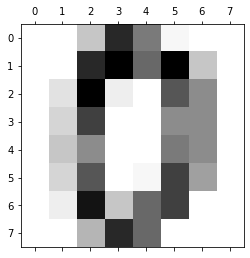

In [5]:
import matplotlib.pyplot as plt
plt.matshow(digits.images[0], cmap="Greys")
plt.show()